In [1]:
import os
import pyspark

from pymongo import MongoClient

In [2]:
conf = pyspark.SparkConf()
conf.set('spark.ui.proxyBase', '/user/' + os.environ['JUPYTERHUB_USER'] + '/proxy/4040')

sc = pyspark.SparkContext(conf=conf)
spark = pyspark.sql.SparkSession(sc)
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/09 11:44:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
username = "vt2182"
password = "vt2182"
host = "mongo-csgy-6513-spring.db"
auth_database = "vt2182"

In [4]:
mongo_conn_str = f"mongodb://{username}:{password}@{host}/{auth_database}"
client = MongoClient(mongo_conn_str)

In [5]:
db = client[auth_database]
db

Database(MongoClient(host=['mongo-csgy-6513-spring.db:27017'], document_class=dict, tz_aware=False, connect=True), 'vt2182')

In [6]:
db.list_collection_names()

['yellow_tripdata_raw', 'yellow_tripdata']

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Get the collection
collection = db['yellow_tripdata']

In [9]:
# Fetch data from MongoDB, excluding the _id field
data = list(collection.find({}, {'_id': 0}))

In [10]:
# Convert list of dictionaries to pandas DataFrame
pandas_df = pd.DataFrame(data)

In [11]:
# Convert pandas DataFrame to Spark DataFrame
df = spark.createDataFrame(pandas_df)

/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [12]:
# Count the number of rows
print("The data contains {} rows.".format(df.count()))

23/05/09 11:46:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


23/05/09 11:46:21 WARN TaskSetManager: Stage 0 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.
The data contains 115832 rows.


In [13]:
df.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- pickup_year: long (nullable = true)
 |-- pickup_month: long (nullable = true)
 |-- pickup_day: long (nullable = true)
 |-- pickup_hour

In [14]:
df.limit(5).toPandas()

23/05/09 11:46:27 WARN TaskSetManager: Stage 3 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_day_of_week,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_day_of_week
0,2,2022-12-03 19:14:47,2022-12-03 19:31:51,1.0,3.37,1.0,N,143,152,1,...,2022,12,3,19,7,2022,12,3,19,7
1,2,2022-12-01 11:55:12,2022-12-01 12:18:01,6.0,1.00,1.0,N,100,230,2,...,2022,12,1,11,5,2022,12,1,12,5
2,1,2022-12-12 15:54:24,2022-12-12 15:59:52,1.0,1.90,1.0,N,236,74,1,...,2022,12,12,15,2,2022,12,12,15,2
3,1,2022-12-20 05:34:23,2022-12-20 06:14:12,1.0,0.10,99.0,N,242,242,1,...,2022,12,20,5,3,2022,12,20,6,3
4,2,2022-12-10 03:59:40,2022-12-10 04:07:27,1.0,1.99,1.0,N,24,236,1,...,2022,12,10,3,7,2022,12,10,4,7


In [15]:
# Get summary statistics
df.describe().show()

23/05/09 11:46:36 WARN TaskSetManager: Stage 4 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+-------+-------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+
|summary|           VendorID|   passenger_count|     trip_distance|       RatecodeID|store_and_fwd_flag|     PULocationID|      DOLocationID|       payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|       airport_fee|       pickup_year|     pickup_month|        pickup_day|       pickup_hour|pickup_day_of_week|       dropoff_year|     dropoff_month

In [17]:
# Get summary statistics of numerical columns

numerical_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
df.select(numerical_columns).describe().show()

23/05/09 11:47:24 WARN TaskSetManager: Stage 13 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+------------------+
|summary|   passenger_count|     trip_distance|       fare_amount|             extra|            mta_tax|        tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|       airport_fee|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+------------------+
|  count|            115832|            115832|            115832|            115832|             115832|            115832|            115832|               115832|            115832|              115832|            115832|
|   mean|1.4038089647075074|3.4554250120864753|14.520804009254714|1.0377516575730368|0.4881827992264

In [18]:
# Get the distribution of categorical variables

df.groupBy("VendorID").count().orderBy("count", ascending=False).show(5)
df.groupBy("RatecodeID").count().orderBy("count", ascending=False).show(5)
df.groupBy("store_and_fwd_flag").count().orderBy("count", ascending=False).show(5)
df.groupBy("PULocationID").count().orderBy("count", ascending=False).show(5)
df.groupBy("DOLocationID").count().orderBy("count", ascending=False).show(5)
df.groupBy("payment_type").count().orderBy("count", ascending=False).show(5)

23/05/09 11:47:27 WARN TaskSetManager: Stage 16 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+--------+-----+
|VendorID|count|
+--------+-----+
|       2|82627|
|       1|33205|
+--------+-----+

23/05/09 11:47:30 WARN TaskSetManager: Stage 19 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+----------+------+
|RatecodeID| count|
+----------+------+
|       1.0|109462|
|       2.0|  4457|
|       5.0|  1000|
|      99.0|   420|
|       3.0|   321|
+----------+------+
only showing top 5 rows

23/05/09 11:47:32 WARN TaskSetManager: Stage 22 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+------------------+------+
|store_and_fwd_flag| count|
+------------------+------+
|                 N|114281|
|                 Y|  1551|
+------------------+------+

23/05/09 11:47:34 WARN TaskSetManager: Stage 25 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+------------+-----+
|PULocationID|count|
+------------+-----+
|         132| 5654|
|         237| 5493|
|         236| 4913|
|         161| 4717|
|         186| 3904|
+------------+-----+
only showing top 5 rows

23/05/09 11:47:36 WARN TaskSetManager: Stage 28 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+------------+-----+
|DOLocationID|count|
+------------+-----+
|         236| 5115|
|         237| 4696|
|         161| 4250|
|         230| 3455|
|         170| 3424|
+------------+-----+
only showing top 5 rows

23/05/09 11:47:38 WARN TaskSetManager: Stage 31 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


+------------+-----+
|payment_type|count|
+------------+-----+
|           1|91166|
|           2|23322|
|           4|  746|
|           3|  598|
+------------+-----+



In [19]:
# Compute average trip distance by hour of day
avg_distance_by_hour = df.groupBy("pickup_hour").avg("trip_distance")

# Convert to Pandas DataFrame for plotting
avg_distance_by_hour_pd = avg_distance_by_hour.toPandas()

# Create a histogram of 'trip_distance'
trip_distance_histogram = df.select('trip_distance').rdd.flatMap(lambda x: x).histogram(10)

# The 'histogram' function returns two lists: bin_edges and counts
bin_edges = trip_distance_histogram[0]
counts = trip_distance_histogram[1]

23/05/09 11:52:55 WARN TaskSetManager: Stage 34 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:52:56 WARN TaskSetManager: Stage 37 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:53:00 WARN TaskSetManager: Stage 38 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


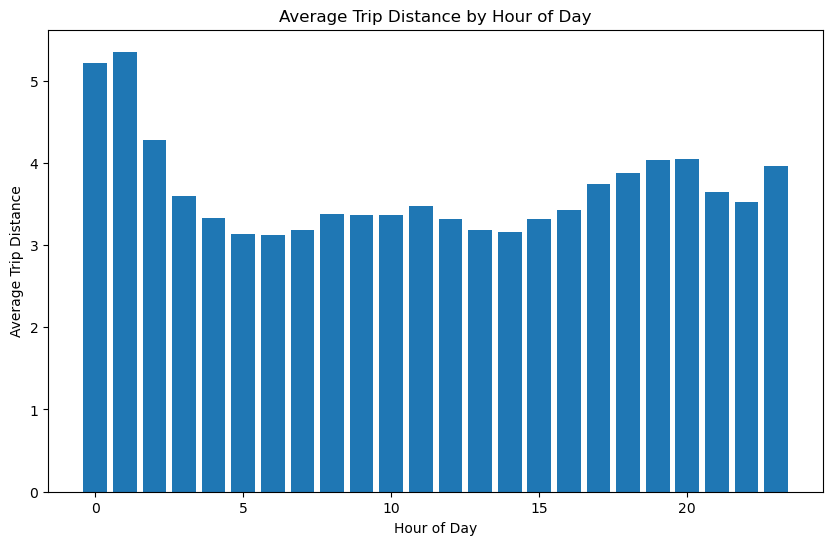

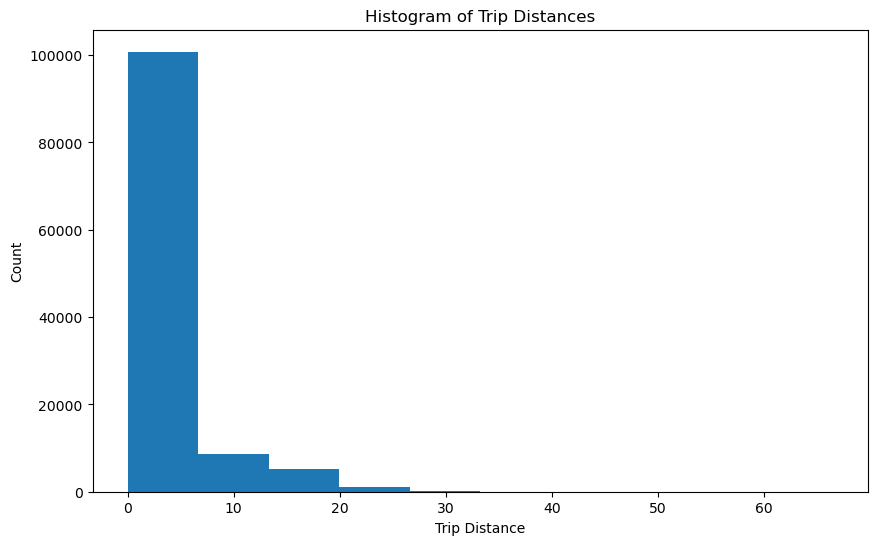

In [20]:
# Plot average trip distance by hour of day
plt.figure(figsize=(10,6))
plt.bar(avg_distance_by_hour_pd['pickup_hour'], avg_distance_by_hour_pd['avg(trip_distance)'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Hour of Day')
plt.show()

# Plot histogram of trip distances
plt.figure(figsize=(10,6))
plt.hist(bin_edges[:-1], bin_edges, weights=counts)
plt.xlabel('Trip Distance')
plt.ylabel('Count')
plt.title('Histogram of Trip Distances')
plt.show()

In [23]:
# Temporal Patterns

pickup_hour_counts = df.groupBy('pickup_hour').count().toPandas()
pickup_day_of_week_counts = df.groupBy('pickup_day_of_week').count().toPandas()
pickup_day_counts = df.groupBy('pickup_day').count().toPandas()

dropoff_hour_counts = df.groupBy('dropoff_hour').count().toPandas()
dropoff_day_of_week_counts = df.groupBy('dropoff_day_of_week').count().toPandas()
dropoff_day_counts = df.groupBy('dropoff_day').count().toPandas()

23/05/09 11:57:04 WARN TaskSetManager: Stage 51 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:57:05 WARN TaskSetManager: Stage 54 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:57:07 WARN TaskSetManager: Stage 57 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:57:09 WARN TaskSetManager: Stage 60 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:57:11 WARN TaskSetManager: Stage 63 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


23/05/09 11:57:13 WARN TaskSetManager: Stage 66 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


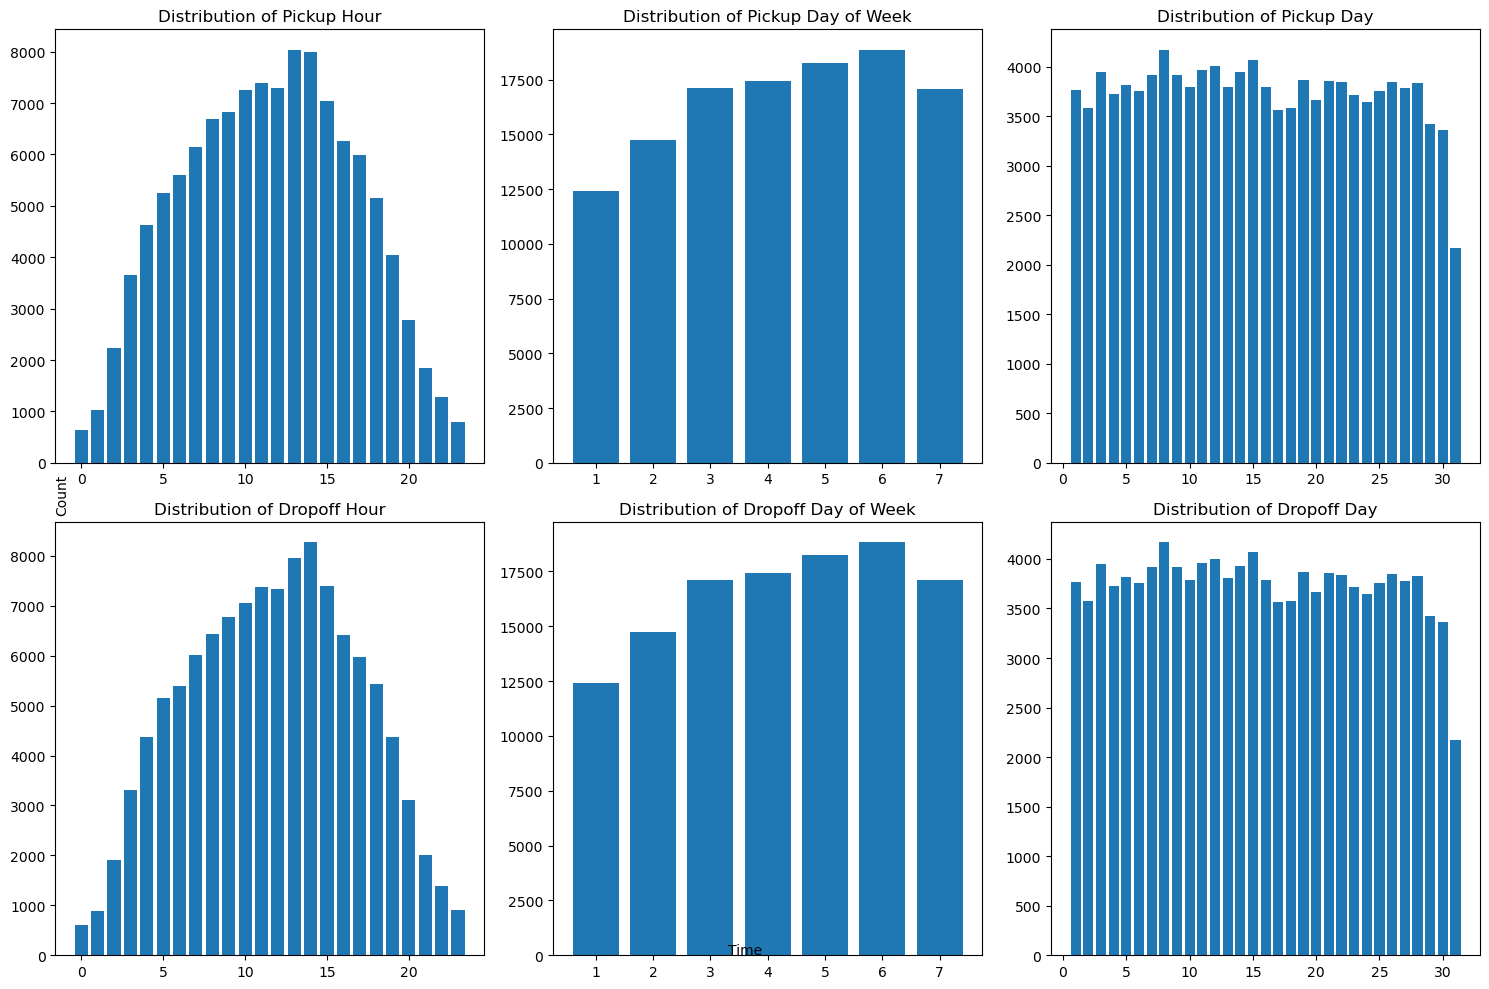

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the distributions
axs[0, 0].bar(pickup_hour_counts['pickup_hour'], pickup_hour_counts['count'])
axs[0, 0].set_title('Distribution of Pickup Hour')

axs[0, 1].bar(pickup_day_of_week_counts['pickup_day_of_week'], pickup_day_of_week_counts['count'])
axs[0, 1].set_title('Distribution of Pickup Day of Week')

axs[0, 2].bar(pickup_day_counts['pickup_day'], pickup_day_counts['count'])
axs[0, 2].set_title('Distribution of Pickup Day')

axs[1, 0].bar(dropoff_hour_counts['dropoff_hour'], dropoff_hour_counts['count'])
axs[1, 0].set_title('Distribution of Dropoff Hour')

axs[1, 1].bar(dropoff_day_of_week_counts['dropoff_day_of_week'], dropoff_day_of_week_counts['count'])
axs[1, 1].set_title('Distribution of Dropoff Day of Week')

axs[1, 2].bar(dropoff_day_counts['dropoff_day'], dropoff_day_counts['count'])
axs[1, 2].set_title('Distribution of Dropoff Day')

# Set common labels
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

## Hourly Rides

The table shows that the pickup hours for taxi rides peak during the early afternoon (around 13:00 or 1 PM). The lowest number of pickups occurs around midnight (0:00). This could be due to the fact that most people are active and out during the day, especially around lunchtime and in the afternoon. At night, people are likely at home or already at their destination, so the demand for taxis drops.

In [25]:
# Calculate the correlation between 'trip_distance' and 'fare_amount'
trip_distance_fare_amount_corr = df.stat.corr('trip_distance', 'fare_amount')
print("Correlation between trip distance and fare amount: ", trip_distance_fare_amount_corr)

23/05/09 11:57:33 WARN TaskSetManager: Stage 69 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


Correlation between trip distance and fare amount:  0.8349329940751841


## Correlation between Trip Distance and Fare Amount

The correlation coefficient between `trip_distance` and `fare_amount` is approximately 0.83, which indicates a strong positive relationship. As the trip distance increases, the fare amount also increases, which makes intuitive sense.

In [26]:
# Calculate the correlation between 'tip_amount' and 'total_amount'
tip_amount_total_amount_corr = df.stat.corr('tip_amount', 'total_amount')
print("Correlation between tip amount and total amount: ", tip_amount_total_amount_corr)

# Calculate the correlation between 'trip_distance' and 'pickup_hour'
trip_distance_pickup_hour_corr = df.stat.corr('trip_distance', 'pickup_hour')
print("Correlation between trip distance and pickup hour: ", trip_distance_pickup_hour_corr)

23/05/09 11:57:36 WARN TaskSetManager: Stage 70 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


Correlation between tip amount and total amount:  0.7010221277447248
23/05/09 11:57:38 WARN TaskSetManager: Stage 71 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


Correlation between trip distance and pickup hour:  0.012046207366665843


## Correlation between Trip Distance and Pickup Hour

The correlation between `trip_distance` and `pickup_hour` is approximately 0.01, which is very close to zero. This suggests that there is no meaningful linear relationship between the trip distance and the hour of the day when the trip started. This is also reasonable since the trip distance is more likely to be dependent on the origin and destination of the trip rather than the time it was initiated.

## `VendorID`

A code indicating the TPEP provider that provided the record.   

- 1 = Creative Mobile Technologies, LLC;
- 2 = VeriFone Inc. 

23/05/09 12:26:23 WARN TaskSetManager: Stage 116 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


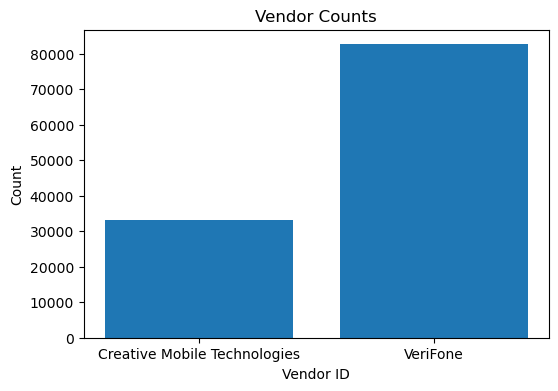

In [34]:
vendor_counts = df.groupBy('VendorID').count().toPandas()

plt.figure(figsize=(6,4))
plt.bar(vendor_counts['VendorID'], vendor_counts['count'])
plt.title('Vendor Counts')
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.xticks([1, 2], ['Creative Mobile Technologies', 'VeriFone'])
plt.show()

## `payment_type`

A numeric code signifying how the passenger paid for the trip.  
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

23/05/09 12:28:15 WARN TaskSetManager: Stage 119 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


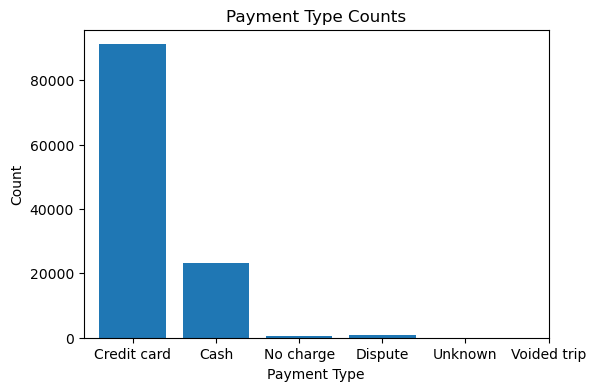

In [35]:
payment_type_counts = df.groupBy('payment_type').count().toPandas()

plt.figure(figsize=(6,4))
plt.bar(payment_type_counts['payment_type'], payment_type_counts['count'])
plt.title('Payment Type Counts')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(range(1, 7), ['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'])
plt.show()

## `RateCodeID`

The final rate code in effect at the end of the trip. 
- 1 = Standard rate 
- 2 = JFK 
- 3 = Newark 
- 4 = Nassau or Westchester 
- 5 = Negotiated fare 
- 6 = Group ride

23/05/09 12:35:45 WARN TaskSetManager: Stage 137 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


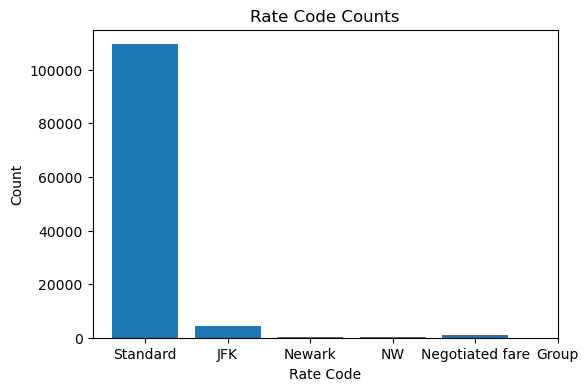

In [40]:
valid_rate_codes = df.filter(df.RatecodeID.between(1, 6))
rate_code_counts = valid_rate_codes.groupBy('RatecodeID').count().toPandas()

plt.figure(figsize=(6,4))
plt.bar(rate_code_counts['RatecodeID'], rate_code_counts['count'])
plt.title('Rate Code Counts')
plt.xlabel('Rate Code')
plt.ylabel('Count')
plt.xticks(range(1, 7), ['Standard', 'JFK', 'Newark', 'NW', 'Negotiated fare', 'Group'])
plt.show()

## `PULocationID`

TLC Taxi Zone in which the taximeter was engaged

## `DOLocationID`

TLC Taxi Zone in which the taximeter was disengaged

In [42]:
# Load the taxi zones CSV
taxi_zones = spark.read.csv('../data/taxi_zone_lookup.csv', header=True)

In [44]:
# Create two separate dataframes for pickups and dropoffs
taxi_zones_pickup = taxi_zones.selectExpr("LocationID as PU_LocationID", "Zone as PU_Zone")
taxi_zones_dropoff = taxi_zones.selectExpr("LocationID as DO_LocationID", "Zone as DO_Zone")

# Join with the DataFrame to get zone names
df_with_zones = df.join(taxi_zones_pickup, df.PULocationID == taxi_zones_pickup.PU_LocationID, how='left')\
                  .join(taxi_zones_dropoff, df.DOLocationID == taxi_zones_dropoff.DO_LocationID, how='left')

23/05/09 12:40:15 WARN TaskSetManager: Stage 143 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


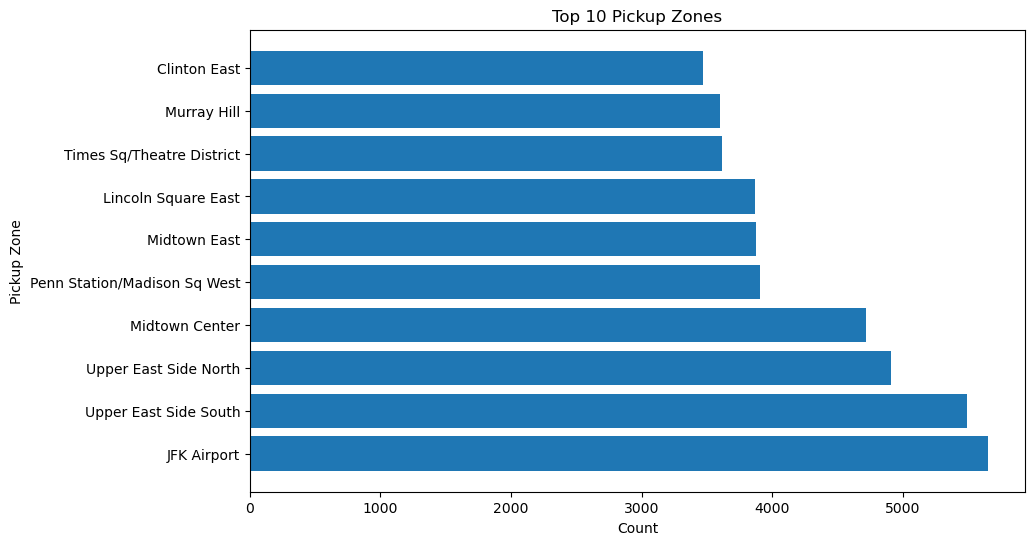

23/05/09 12:40:18 WARN TaskSetManager: Stage 148 contains a task of very large size (9190 KiB). The maximum recommended task size is 1000 KiB.


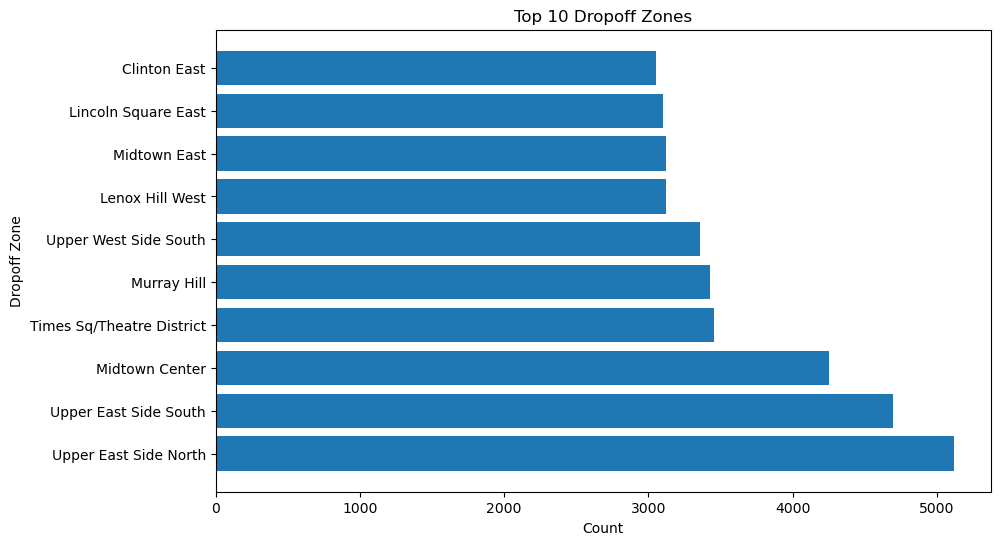

In [45]:
# Top 10 Pickup Zones
pickup_zone_counts = df_with_zones.groupBy('PU_Zone').count().orderBy('count', ascending=False).limit(10).toPandas()

plt.figure(figsize=(10,6))
plt.barh(pickup_zone_counts['PU_Zone'], pickup_zone_counts['count'])
plt.title('Top 10 Pickup Zones')
plt.xlabel('Count')
plt.ylabel('Pickup Zone')
plt.show()

# Top 10 Dropoff Zones
dropoff_zone_counts = df_with_zones.groupBy('DO_Zone').count().orderBy('count', ascending=False).limit(10).toPandas()

plt.figure(figsize=(10,6))
plt.barh(dropoff_zone_counts['DO_Zone'], dropoff_zone_counts['count'])
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Count')
plt.ylabel('Dropoff Zone')
plt.show()


In [58]:
!pip install geopandas matplotlib descartes contextily

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 46.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 6.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [53]:
import geopandas as gpd

# Load the geojson file
nyc_zones = gpd.read_file('../data/taxi_zones.geojson')

nyc_zones

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."
...,...,...,...,...,...,...,...
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."


In [54]:
pickup_counts_pandas = pickup_zone_counts.set_index('PU_Zone')['count']
dropoff_counts_pandas = dropoff_zone_counts.set_index('DO_Zone')['count']

In [56]:
# Make sure the Zone column is a string
nyc_zones['zone'] = nyc_zones['zone'].astype(str)

# Merge the pickup and dropoff count data
nyc_zones = nyc_zones.set_index('zone').join(pickup_counts_pandas.rename('pickup_count')).join(dropoff_counts_pandas.rename('dropoff_count'))

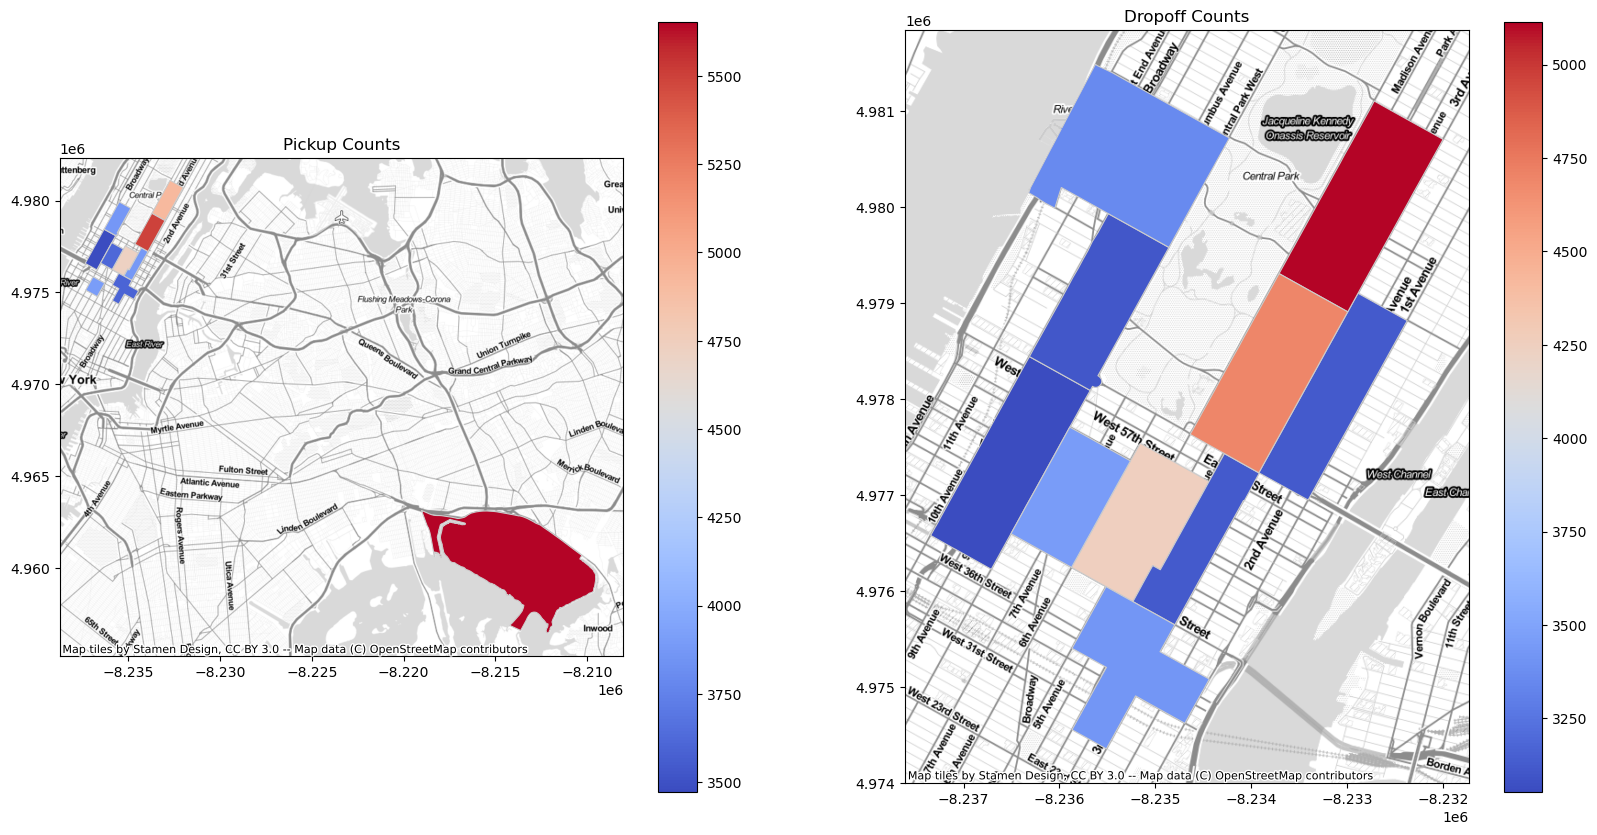

In [59]:
import contextily as ctx

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot pickup counts
nyc_zones.to_crs(epsg=3857).plot(column='pickup_count', cmap='coolwarm', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Pickup Counts')
ctx.add_basemap(ax[0], source=ctx.providers.Stamen.TonerLite)

# Plot dropoff counts
nyc_zones.to_crs(epsg=3857).plot(column='dropoff_count', cmap='coolwarm', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Dropoff Counts')
ctx.add_basemap(ax[1], source=ctx.providers.Stamen.TonerLite)

plt.show()

## Plot distribution of 'payment_type' during different pickup hours

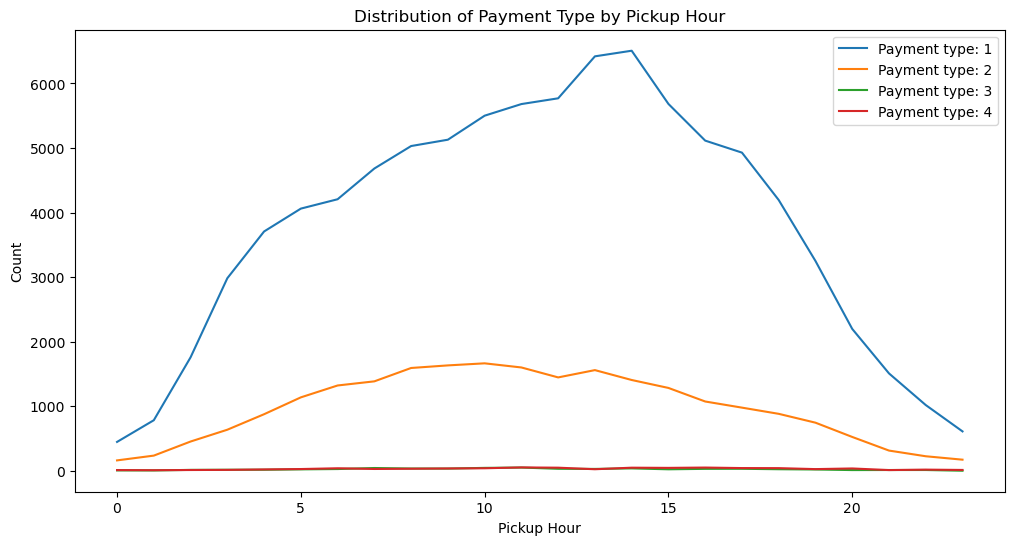

In [30]:
plt.figure(figsize=(12, 6))
for payment_type in payment_hour_dist['payment_type'].unique():
    subset = payment_hour_dist[payment_hour_dist['payment_type'] == payment_type]
    plt.plot(subset['pickup_hour'], subset['count'], label='Payment type: ' + str(payment_type))
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.title('Distribution of Payment Type by Pickup Hour')
plt.legend()
plt.show()